In [1]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = [
'Class label',
'Alcohol ',
'Malic acid ',
'Ash ',
'Alcalinity of ash',
'Magnesium' ,
'Total phenols ',
'Flavanoids ',
'Nonflavanoid phenols ',
'Proanthocyanins' ,
'Color intensity',
'Hue',
'OD280/OD315 of diluted wines',
'Proline'
]

In [2]:
from sklearn.cross_validation import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

/home/quoniam/anaconda2/envs/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]

In [17]:
forest = RandomForestClassifier(n_estimators=20000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [18]:
importances = forest.feature_importances_

In [19]:
importances

array([ 0.10591488,  0.02527693,  0.01374311,  0.03267615,  0.02258301,
        0.06084692,  0.15257605,  0.01449519,  0.02265907,  0.18127355,
        0.07764629,  0.13176919,  0.15853966])

In [20]:
import numpy as np

indices = np.argsort(importances)[::-1]

In [21]:
indices

array([ 9, 12,  6, 11,  0, 10,  5,  3,  1,  8,  4,  7,  2])

In [22]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f], importances[indices[f]]))

 1) Alcohol                        0.181274
 2) Malic acid                     0.158540
 3) Ash                            0.152576
 4) Alcalinity of ash              0.131769
 5) Magnesium                      0.105915
 6) Total phenols                  0.077646
 7) Flavanoids                     0.060847
 8) Nonflavanoid phenols           0.032676
 9) Proanthocyanins                0.025277
10) Color intensity                0.022659
11) Hue                            0.022583
12) OD280/OD315 of diluted wines   0.014495
13) Proline                        0.013743


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')

<Container object of 13 artists>

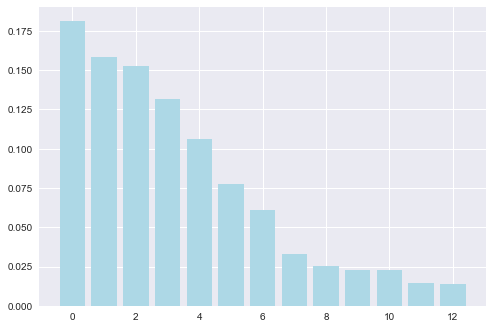

In [26]:
plt.show()